[View in Colaboratory](https://colab.research.google.com/github/saedhussain/Keras_CIFAR10_CNN_Analysis/blob/master/Keras_CNN_CIFAR10.ipynb)

# CIFAR10 Classification Model in Keras  
*(including dropout and data augmentation)*

In [2]:
# Import tf.keras 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

# Import Support Library's
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Check if GPU is connected
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## **Import CIFAR10 dataset from Keras**

In [3]:
from keras.datasets import cifar10

# Get the training and test data set's
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 22s 0us/step


## Explore Imported Data

Training Data Shape:  (50000, 32, 32, 3) (50000, 1)
Test Data Shape:  (10000, 32, 32, 3) (10000, 1)


Num of Output Classes:10
Output Classes: [0 1 2 3 4 5 6 7 8 9]




Text(0.5,1,'Ground Truth : [3]')

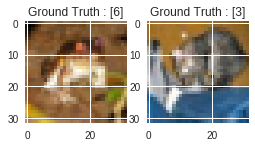

In [4]:
# Shape of the data
print("Training Data Shape: ", train_images.shape, train_labels.shape)
print("Test Data Shape: ", test_images.shape, test_labels.shape)
print("\n")

# Unique Classes
classes = np.unique(train_labels)
nClasses = len(classes)

print("Num of Output Classes:{0}".format(nClasses))
print("Output Classes: {0}".format(classes))
print("\n")

# View images in dataset
plt.figure(figsize=[4,2])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {0}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {0}".format(test_labels[0]))


## Data Preprocessing

In [5]:
# Helper function to one hot code category data
from keras.utils import to_categorical


# Find the shape of input images and create the variable input_shape
nTrainSample,nRows, nCols, nDims = train_images.shape
nTestSample = test_images.shape[0]
input_shape = (nRows, nCols, nDims)


train_data = train_images.reshape(nTrainSample, nRows, nCols, nDims)
test_data = test_images.reshape(nTestSample, nRows, nCols, nDims)


# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255


# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Create CNN Model (No Dropout Layer)

In [0]:
def createCNNModel_No_Dropout():
  
  model = Sequential()
  
  # Two convolution layers with 32 filters of size 3 x 3
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation='relu', input_shape = input_shape))
  model.add(Conv2D(32, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(64, (3,3), padding = 'same', activation='relu'))
  model.add(Conv2D(64, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(64, (3,3), padding = 'same', activation='relu'))
  model.add(Conv2D(64, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(nClasses, activation='softmax'))
  
  return model

## Train CNN (NO Dropout Model)

In [22]:
cnn_model_no_dropout = createCNNModel_No_Dropout()

batch_size = 256
epochs = 30

cnn_model_no_dropout.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

cnn_model_no_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 6, 6, 64)          36928     
__________

In [23]:
# Now let's train
history = cnn_model_no_dropout.fit(train_data,
                        train_labels_one_hot,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(test_data, test_labels_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 213us/step - loss: 2.0220 - acc: 0.2661 - val_loss: 2.1260 - val_acc: 0.2688
Epoch 2/30
50000/50000 [==============================] - 10s 206us/step - loss: 1.6313 - acc: 0.4131 - val_loss: 1.5481 - val_acc: 0.4477
Epoch 3/30
50000/50000 [==============================] - 10s 203us/step - loss: 1.4024 - acc: 0.4996 - val_loss: 1.3610 - val_acc: 0.4987
Epoch 4/30
50000/50000 [==============================] - 10s 202us/step - loss: 1.2401 - acc: 0.5629 - val_loss: 1.1303 - val_acc: 0.5979
Epoch 5/30
50000/50000 [==============================] - 10s 203us/step - loss: 1.1064 - acc: 0.6081 - val_loss: 1.0752 - val_acc: 0.6235
Epoch 6/30
50000/50000 [==============================] - 10s 204us/step - loss: 1.0134 - acc: 0.6424 - val_loss: 1.1419 - val_acc: 0.5961
Epoch 7/30
50000/50000 [==============================] - 10s 202us/step - loss: 0.9243 - acc: 0.6754 - val_loss: 1.

In [24]:
# Let's now evaluate the model
cnn_model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 2s 180us/step


[0.7080620238304138, 0.7734]

## Plot Loss and Accuracy Curves  (No Droput Model)

In [25]:
# Let's see what we can plat from the training hitory
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'Accuracy Curves')

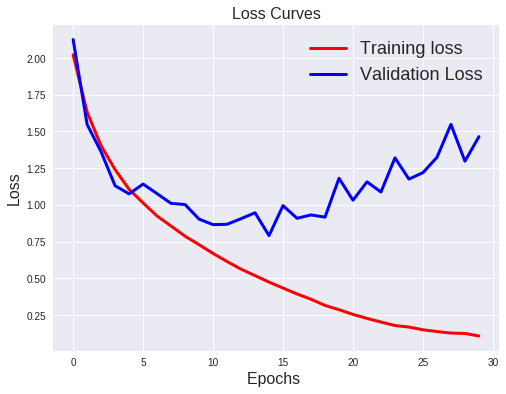

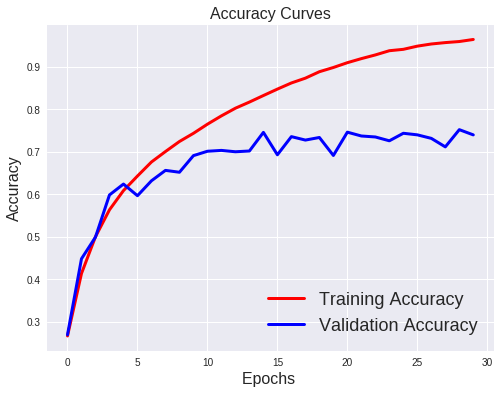

In [26]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations**

Looks like after the 3rd epoch, the valdidation accurracy started to decrease.<br>
However, the accuracy on the training data increased. <br>
This is clear intication of overfitting and lack of generalisiation abilitiy.

Let's try to sovle the generilisation issue using droupout layers!

## Create CNN Model (with Dropout Layers)



In [0]:
def createCNNModel():
  
  model = Sequential()
  
  # Two convolution layers with 32 filters of size 3 x 3
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation='relu', input_shape = input_shape))
  model.add(Conv2D(32, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64, (3,3), padding = 'same', activation='relu'))
  model.add(Conv2D(64, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64, (3,3), padding = 'same', activation='relu'))
  model.add(Conv2D(64, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(nClasses, activation='softmax'))
  
  return model
  


## Train Model

In [7]:
cnn_model = createCNNModel()

batch_size = 256
epochs = 30

cnn_model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

cnn_model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [8]:
# Now let's train
history = cnn_model.fit(train_data,
                        train_labels_one_hot,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(test_data, test_labels_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s 256us/step - loss: 2.0560 - acc: 0.2516 - val_loss: 1.7810 - val_acc: 0.3550
Epoch 2/30
50000/50000 [==============================] - 11s 220us/step - loss: 1.6842 - acc: 0.3898 - val_loss: 1.5010 - val_acc: 0.4475
Epoch 3/30
50000/50000 [==============================] - 11s 222us/step - loss: 1.4831 - acc: 0.4653 - val_loss: 1.4634 - val_acc: 0.4705
Epoch 4/30
50000/50000 [==============================] - 11s 222us/step - loss: 1.3375 - acc: 0.5213 - val_loss: 1.3563 - val_acc: 0.5114
Epoch 5/30
50000/50000 [==============================] - 11s 220us/step - loss: 1.2308 - acc: 0.5613 - val_loss: 1.3202 - val_acc: 0.5479
Epoch 6/30
50000/50000 [==============================] - 11s 222us/step - loss: 1.1531 - acc: 0.5922 - val_loss: 1.1074 - val_acc: 0.6067
Epoch 7/30
50000/50000 [==============================] - 11s 220us/step - loss: 1.0890 - acc: 0.6136 - val_loss: 1.

In [9]:
# Let's now evaluate the model
cnn_model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 2s 189us/step


[0.7080620238304138, 0.7734]

## Plot Loss and Accuracy Curves 

In [13]:
# Let's see what we can plat from the training hitory
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'Accuracy Curves')

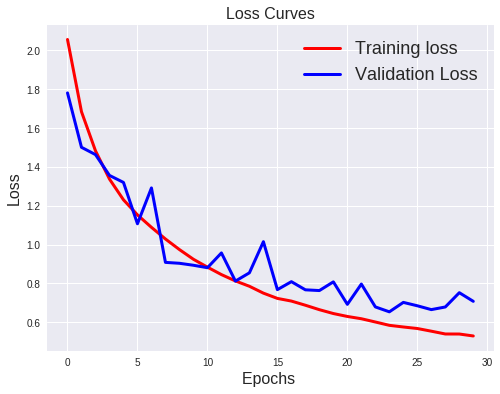

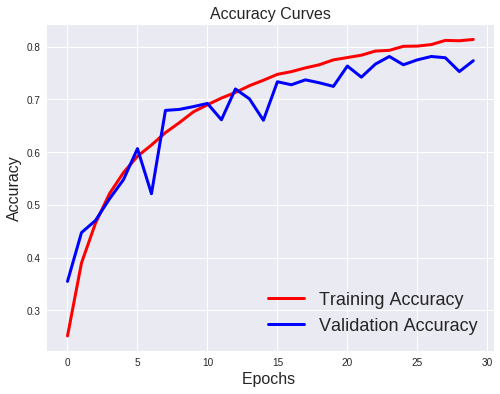

In [17]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations**

From the plots it is very clear that valdiation data accuracy is poor compared to the training data.

This is an indication that the neural network has memorised the training data and couldn't generalsie enough on the validation data.

Let's use data augmentation to see if the network generalises better.

## New Model with Data Augmentation

In [19]:
# Use Keras to help augment data
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             vertical_flip=False)  # randomly flip images

# Create new model
cnn_model2 = createCNNModel()

cnn_model2.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
history2 = cnn_model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)
 


Epoch 1/30
196/196 [==============================] - 36s 185ms/step - loss: 2.1172 - acc: 0.2213 - val_loss: 1.7992 - val_acc: 0.3580
Epoch 2/30
196/196 [==============================] - 35s 179ms/step - loss: 1.7953 - acc: 0.3445 - val_loss: 1.5732 - val_acc: 0.4138
Epoch 3/30
196/196 [==============================] - 35s 181ms/step - loss: 1.6127 - acc: 0.4137 - val_loss: 1.4773 - val_acc: 0.4612
Epoch 4/30
196/196 [==============================] - 36s 182ms/step - loss: 1.4778 - acc: 0.4696 - val_loss: 1.4070 - val_acc: 0.4899
Epoch 5/30
196/196 [==============================] - 36s 182ms/step - loss: 1.3734 - acc: 0.5032 - val_loss: 1.2184 - val_acc: 0.5516
Epoch 6/30
196/196 [==============================] - 36s 182ms/step - loss: 1.3033 - acc: 0.5319 - val_loss: 1.0873 - val_acc: 0.6052
Epoch 7/30
196/196 [==============================] - 36s 182ms/step - loss: 1.2289 - acc: 0.5612 - val_loss: 1.0491 - val_acc: 0.6221
Epoch 8/30
196/196 [==============================] - 3

## Plot Loss and Accuray Curve for New Trained Model

Text(0.5,1,'Accuracy Curves')

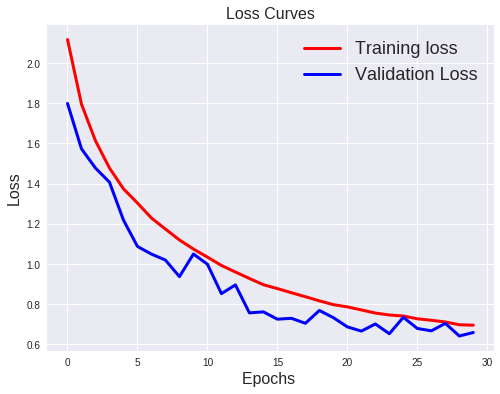

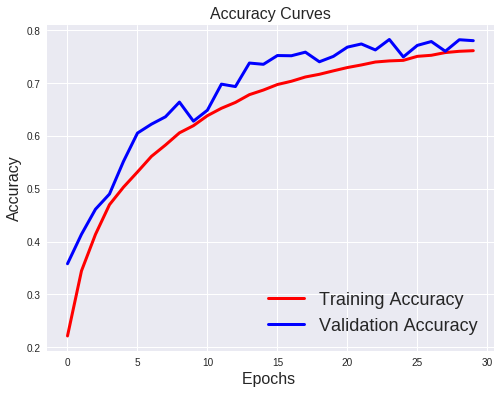

In [20]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [27]:
# Let's now evaluate the model
cnn_model2.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 2s 183us/step


[0.6587447148323059, 0.78]